<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#from scipy import stats

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
data = {}

#Read in sat_scores.csv using csv.reader method

with open("sat_scores.csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)
    for col in headers:
        data[col] = []
    for row in reader:
        for i, element in enumerate(row):
            data[headers[i]].append(element)

csvfile.close()

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#convert to dataframe based on data obtained using csv.reader method, 
#the Rate, Verbal and Math variables are of object type when in fact 
#they are of float type

df_dict = pd.DataFrame(data)
df_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [4]:
#Converting using pd.read_csv would detect float type variables automatically

df = pd.read_csv('sat_scores.csv')
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df.head(10)

# SAT has 2 sections: One section is Math, while the other is a combined
# Reading and Writing score called Evidence-Based Reading and Writing (EBRW).
# Since the data is grouped by state, math is probably the averge score for Math
# section while verbal is probably the average scores for EBRW section. Rate is
# rate of participation

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
df.tail()
# the last entry with state 'All' might be an aggregate value
# of all states, hence dropping this last entry.

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [7]:
# drop last row from the data
df.drop(df.tail(1).index, inplace=True)
df.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
#Creating a data dictionary which ontain the name of each variable (column), 
#the type of the variable, description of what the variable is, and 
#the shape (rows and columns) of the entire dataset.

data_dictionary = {
    'State': {'type': 'string', 'description': 'location where the students that took SAT exam were from'},
    'Rate': {'type': 'int', 'description': 'participation rate of the students in that state'},
    'Verbal': {'type': 'int', 'description': 'average scores of the EBRW section'},
    'Math': {'type': 'int', 'description': 'average scores of the Math section'},
    'shape': {'num_row': 50, 'num_columns': 4}
}

data_dictionary

{'State': {'type': 'string',
  'description': 'location where the students that took SAT exam were from'},
 'Rate': {'type': 'int',
  'description': 'participation rate of the students in that state'},
 'Verbal': {'type': 'int',
  'description': 'average scores of the EBRW section'},
 'Math': {'type': 'int', 'description': 'average scores of the Math section'},
 'shape': {'num_row': 50, 'num_columns': 4}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

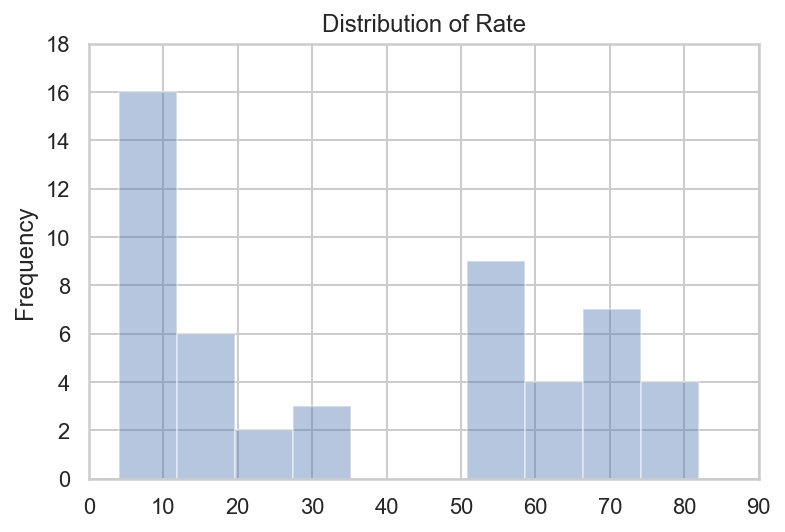

In [9]:
# Distribution plot of Rate
sns.distplot(df['Rate'], bins=10, kde=False)
plt.title("Distribution of Rate")
plt.ylabel("Frequency")
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 20, 2))
plt.xlabel('');

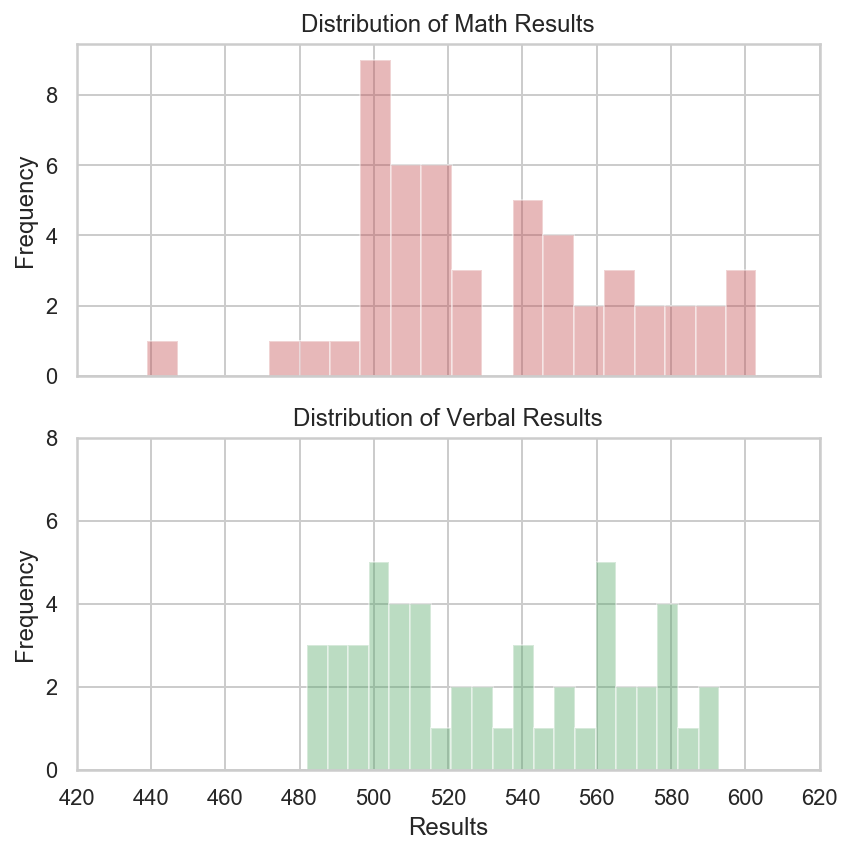

In [10]:
# Distribution plot of Math and Verbal variables
# The reason why this 2 variables are plot on same figure is
# that they have similar values to be plotted on the x axis.

f, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
sns.distplot(df['Math'], bins=20, kde=False, color='r', ax=axes[0])
sns.distplot(df['Verbal'], bins=20, kde=False, color='g', ax=axes[1])
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("")
axes[0].set_title('Distribution of Math Results')
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Results")
axes[1].set_title('Distribution of Verbal Results')
plt.setp(axes, xticks=range(420, 640, 20), yticks=range(0, 10, 2))
plt.tight_layout();

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

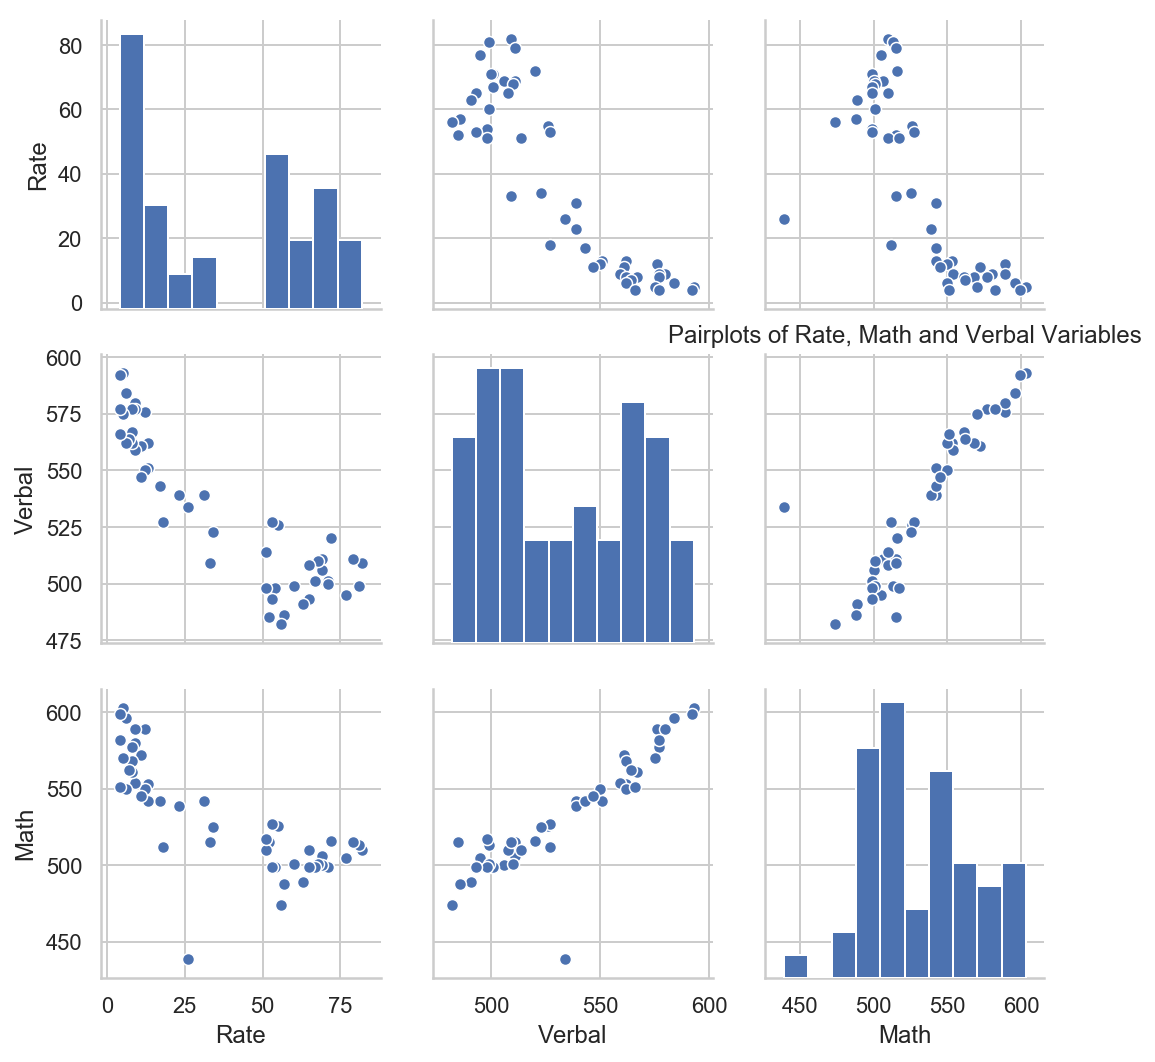

In [11]:
# Pairplot of Rate, Math and Verbal
sns.pairplot(df)
plt.title('Pairplots of Rate, Math and Verbal Variables');

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

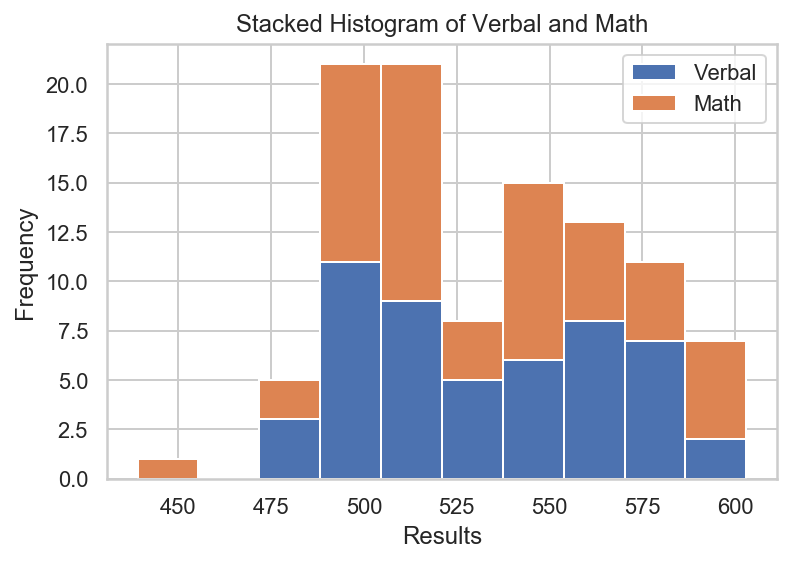

In [12]:
#Stacked histogram of Verbal and Math variables

df[['Verbal', 'Math']].plot(kind = 'hist', stacked = True)
plt.title('Stacked Histogram of Verbal and Math')
plt.xlabel('Results');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5, 1.0, 'Boxplot of Verbal and Math')

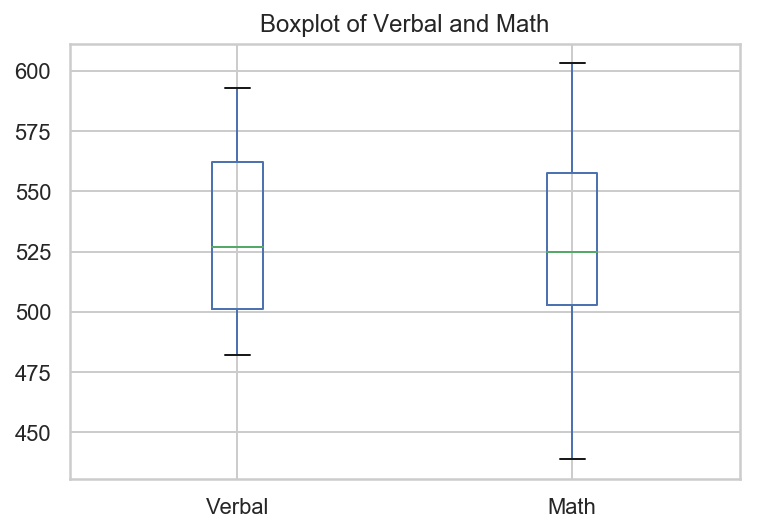

In [13]:
# Boxplot of Verbal and Math variables
df[['Verbal', 'Math']].plot(kind = 'box')
plt.title('Boxplot of Verbal and Math')

Benefits of using a boxplot over scatterplot or histogram is that it allows the reader to easily compare the 25th/50th/75th percentile between the 2 variables. In addition, it is easy to see if the variables contained outliers which may need additional investigation/processing.

Plotting Rate on the same chart as Math and Verbal will cause the boxplots to be small (hard to see the individual points on the boxplot) as there is a relative big difference in values between Rate and Math/Verbal. Rate is range from 0 to 100 while Math and Verbal ranges from 200 to 800 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


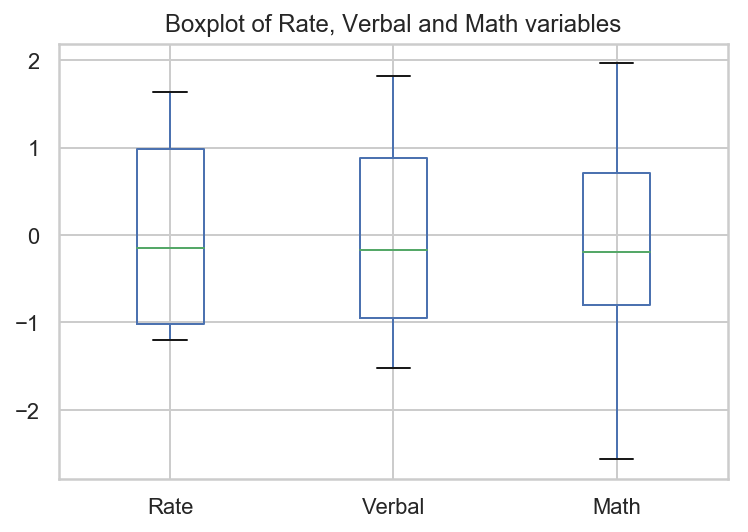

In [14]:
# Made a copy of df for processing
df_copy = df[['Rate', 'Verbal', 'Math']].copy()

# Standardize the variables by (x - mean(x))/ (stdev(x)) 
# to have mean of 0 and standard deviation of 1
df_copy = (df_copy - df_copy.mean()) / (df_copy.std())
df_copy[['Rate', 'Verbal', 'Math']].plot(kind='box')
plt.title('Boxplot of Rate, Verbal and Math variables');

# Standardizing allows us to compare features that have
# different units or scale

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
print('List of states with Verbal scores above mean: {}'
      .format(df[df['Verbal'] > np.mean(df['Verbal'])]['State'].values))
print('Number of states with Verbal scores above mean: {}'
      .format(df[df['Verbal'] > np.mean(df['Verbal'])]['State'].count()))

# About 50% of the states have verbal scores above the average of Verbal scores
# Hence, the distribution is nearly symmetrical

List of states with Verbal scores above mean: ['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']
Number of states with Verbal scores above mean: 24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
print('List of states with Verbal scores above median: {}'
      .format(df[df['Verbal'] > np.median(df['Verbal'])]['State'].values))
print('Number of states with Verbal scores above median: {}'
      .format(df[df['Verbal'] > np.median(df['Verbal'])]['State'].count()))

# both lists are similar as the verbal distribution is nearly symmetrical

List of states with Verbal scores above median: ['CO' 'OH' 'MT' 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE'
 'OK' 'MO' 'LA' 'WI' 'AR' 'UT' 'IA' 'SD' 'ND' 'MS']
Number of states with Verbal scores above median: 24


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
df['Difference'] = df['Verbal']-df['Math']
df.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
#Top 3 states with greatest gap between Verbal and Math 
#where Verbal is greater than Math

df1 = df.sort_values(by='Difference', ascending=False)[:10]
df1[['State']].head(3)

,State
27,OH
50,MS
29,WV


In [19]:
#Top 3 states with greatest gap between Verbal and Math 
#where Math is greater than Verbal

df2 = df.sort_values(by='Difference', ascending=True)[:10]
df2[['State']].head(3)

,State
21,HI
23,CA
1,NJ


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [20]:
df[['Rate', 'Verbal', 'Math']].corr()
# There is high positive correlation between Math and Verbal (0.9)
# There is high negative correction between Rate and Verbal/Math 
# (-0.89 / -0.77 respectively). 

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
df[['Rate', 'Verbal', 'Math']].describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [22]:
#count: Number of elements for each variable
#mean: mean of the elements for each variable
#std: standard deviation of the elements for each variable
#min: minimum of the elements for each variable
#25%/50%/75%: 25th, 50th and 75th quartile value of the elements for each variable
#max: maximum of the elements for each variable

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [23]:
Cov_matrix = df[['Rate', 'Verbal', 'Math']].cov()

# 1.Correlation is a statistical measure that indicates how strongly two
# variables are related and is between -1 and +1. Covariance is a measure
# indicating the extent to which two random variables change in tandem and
# lies between -∞ and +∞.

# 2. To convert covariance to correlation, the forumlae is:

#         rXY = sXY / (Sx * Sy)

# The key terms in this formula are:
# rXY = sample correlation between X and Y
# sXY = sample covariance between X and Y
# sX = sample standard deviation of X
# sY = sample standard deviation of Y

# 3. Correlation has been standardised to be between -1 and +1, hence it is
# useful to measure how strongly related the 2 variables are. Covariance matrix
# on the other hand is unbounded, hence it is not useful for examining the
# relationships between variables in the data

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [24]:
drug = pd.read_csv('./drug-use-by-age.csv', index_col='age')
print(drug.info())

# There are 6 columns which have object type (the frequency values are
# supposed to be float type). A look at the data shows that some of the
# frequency values are missing. This indicates that the data requires cleaning.

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        17 non-null object
tranquilizer-u

In [25]:
drug[['cocaine-use', 'cocaine-frequency', 'crack-use', 'crack-frequency',
      'heroin-use', 'heroin-frequency', 'inhalant-use', 'inhalant-frequency',
      'oxycontin-use', 'oxycontin-frequency', 'meth-use', 'meth-frequency']].head()

# By inspection, the missing frequency values are due to 0% of the age group had
# used the drug in the past 12 months. Hence, the missing values can be replaced by
# zero value

,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,inhalant-use,inhalant-frequency,oxycontin-use,oxycontin-frequency,meth-use,meth-frequency
age,,,,,,,,,,,,
12,0.1,5.0,0.0,-,0.1,35.5,1.6,19.0,0.1,24.5,0.0,-
13,0.1,1.0,0.0,3.0,0.0,-,2.5,12.0,0.1,41.0,0.1,5.0
14,0.1,5.5,0.0,-,0.1,2.0,2.6,5.0,0.4,4.5,0.1,24.0
15,0.5,4.0,0.1,9.5,0.2,1.0,2.5,5.5,0.8,3.0,0.3,10.5
16,1.0,7.0,0.0,1.0,0.1,66.5,3.0,3.0,1.1,4.0,0.3,36.0


In [26]:
# replace missing frequency values by 0 and convert it to float type
drug.replace('-', float(0.0), inplace=True)
drug.iloc[:, 1:] = drug.iloc[:, 1:].astype(float)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

1. Question: Is there a trend between different age groups and the % of drug users for each of the drug types?
2. Deliverable: A chart of the % of the group that used the drug in the past 12 months versus the different age groups.
3. Visual technique is used

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


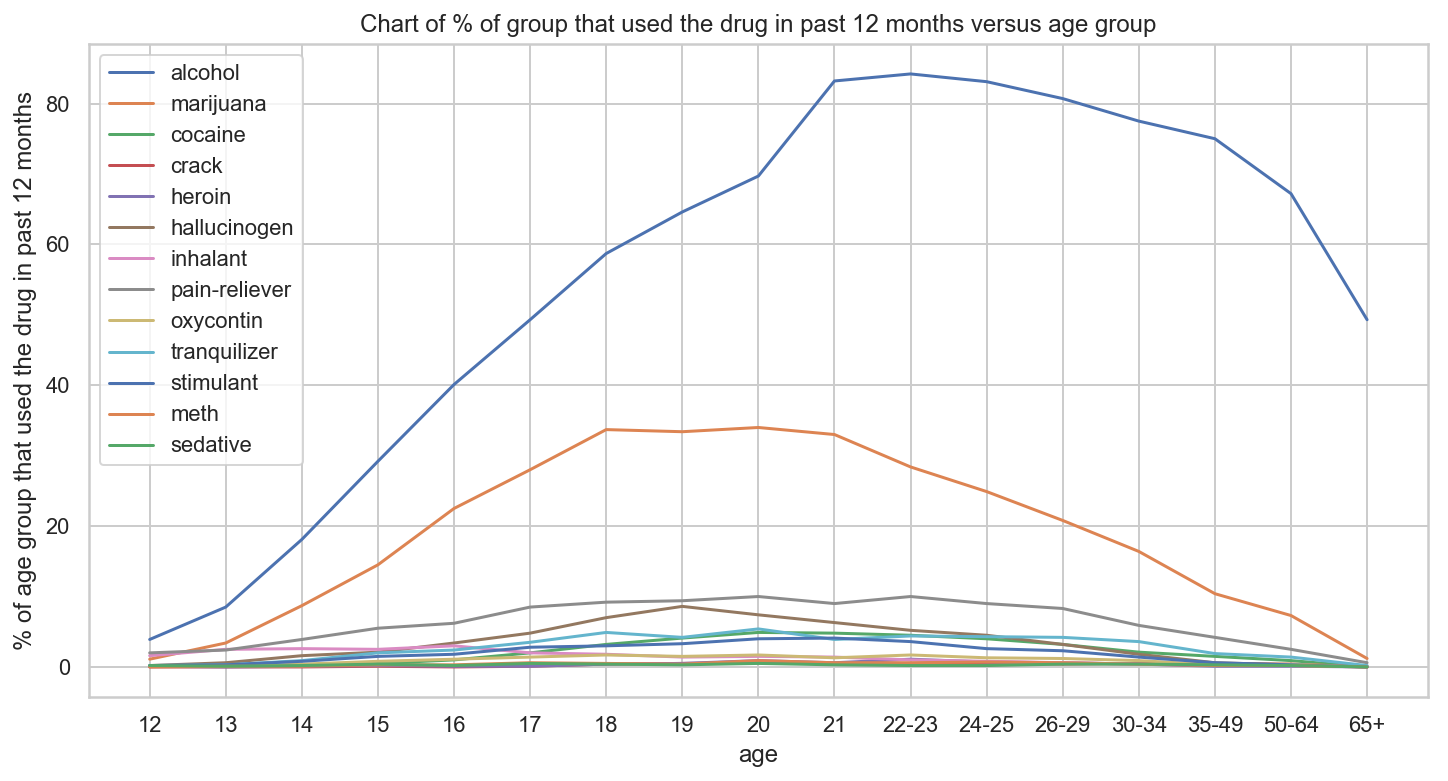

In [27]:
#creating 1 dataframe for drug use
drug_use = drug.iloc[:, range(1, 27, 2)]

#renaming the column names
drug_use.rename(columns={
    'alcohol-use': 'alcohol',
    'hallucinogen-use': 'hallucinogen',
    'inhalant-use': 'inhalant',
    'pain-releiver-use': 'pain-reliever',
    'oxycontin-use': 'oxycontin',
    'tranquilizer-use': 'tranquilizer',
    'stimulant-use': 'stimulant',
    'meth-use': 'meth',
    'sedative-use': 'sedative',
    'marijuana-use': 'marijuana',
    'cocaine-use': 'cocaine',
    'crack-use': 'crack',
    'heroin-use': 'heroin'
}, inplace=True)

# plot the chart of drug-use vs % of age group that used the drug
drug_use.plot(kind='line', figsize=(12, 6))
plt.xticks(range(17), ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
                       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'])
plt.ylabel('% of age group that used the drug in past 12 months')
plt.title('Chart of % of group that used the drug in past 12 months versus age group')
plt.show()

**Report**

4. From the chart above, it was observed that for most of the drugs (except for alcohol and marijuana), <10% of the age group had used them in the last 12 months. For alcohol, the % of the age group that used alcohol increased with age and peak around ages 21 - 29 at >80% and decline thereafter with age. For marijuana, the peak happened around ages 18 - 21 at around 33% and decline there after with age

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

The Z-score is the signed number of standard deviations by which 
the value of an observation or data point is above the mean value 
of what is being observed or measured. If the Z-score value is 
greater than or less than 3 or -3 respectively, that data point 
will be identified as outliers

Z-score: 1.6496061541300324


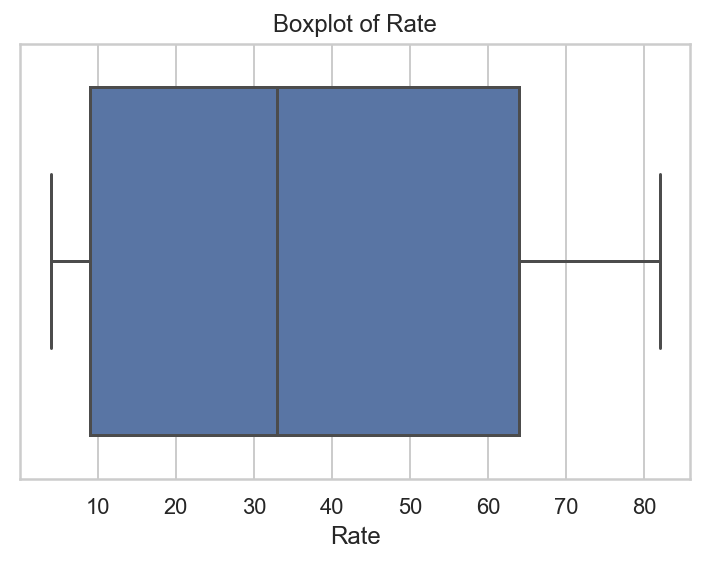

In [28]:
# Method(1): determine max z-score for the Rate variable
z = np.abs(stats.zscore(df['Rate']))
print('Z-score: {}'.format(max(z)))
# Since the max Z-score is within (-3, 3), there are no outliers detected

# Method(2): boxplot
sns.boxplot(df['Rate'])
plt.title('Boxplot of Rate');

Based on the 2 methods (Z-score, Boxplot), no outliers were detected

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


1. Spearman's correlation determines the strength and direction of the 
 monotonic relationship between two variables while pearson coorelation 
 determines the strength and direction of the linear relationship between 
 the two variables.

2. There are 2 cases for calculation of spearman rank correlation:
    a) No tiered ranks
    b) Tiered ranks
  
  The calculation returns a value between -1 and 1 where:
  +1 = perfect positive correlation between ranks
  -1 = perfect negative correlation between ranks
  0  = no correlation between ranks
  
  For case (a): the formula to calculate spearman coefficient,p is
  
  $$p=1- \frac{6}{n(n^2-1)}\sum_{} d_{i}^2$$
  
  where d is difference between ranks of the 2 variables for the same entry &
  n is the number of entries
  
  For case (b): A simplified method is for the 2 entries with same ranks,
  assign the mean of the ranks for these 2 entries, e.g. rank of 5.5 for that
  have the same ranks of 6. Use the same formula in case (a) to compute
  spearman's correlation. For multiple tiered ranks, an option is to use the
  full version of Spearman's formula as detailed in the following url: https://www.statisticshowto.datasciencecentral.com/spearman-rank-correlation-definition-calculate/

In [29]:
# To compute Spearman's correlation between Verbal and Math:
print('Spearman correlation between Verbal and Math: {}'
      .format(stats.spearmanr(df['Verbal'], df['Math'])[0]))

Spearman correlation between Verbal and Math: 0.9094125143903472


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [30]:
#create a new percentilescore column
df['percentilescore'] = df['Rate'].apply(
    lambda x: stats.percentileofscore(df['Rate'], x, kind='weak'))

print(df.head())

#Percentile of California
print(df[df['State'] == 'CA'][['State', 'percentilescore']])

  State  Rate  Verbal  Math  Difference  percentilescore
0    CT    82     509   510          -1       100.000000
1    NJ    81     499   513         -14        98.039216
2    MA    79     511   515          -4        96.078431
3    NY    77     495   505         -10        94.117647
4    NH    72     520   516           4        92.156863
   State  percentilescore
23    CA        56.862745


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

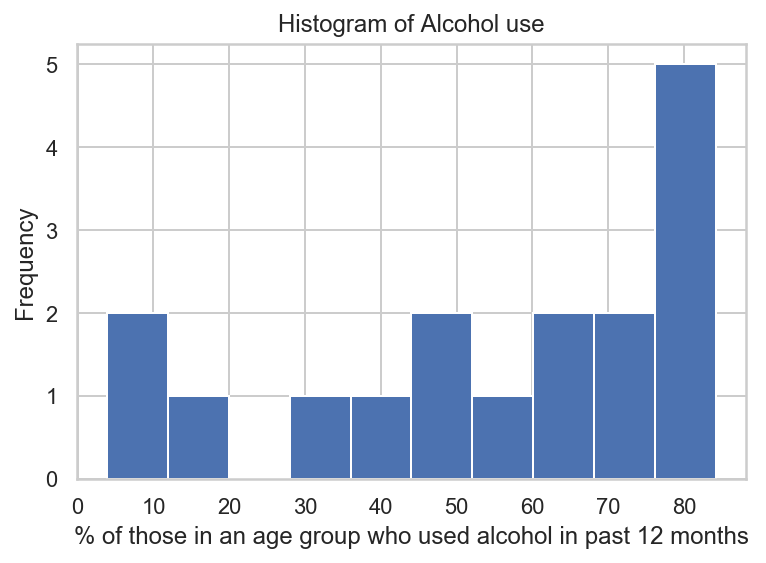

In [31]:
#1. If we sort the percentile score column and calculate 
# the deltas between successive percentile scores. If large 
# deltas are observed for either ends of the data (i.e. ~0% 
# or ~100%), this may suggest presence of outliers.

#2. plot distribution of 'alchol-use' variable
drug_use['alcohol'].plot.hist()
plt.title('Histogram of Alcohol use')
plt.xlabel('% of those in an age group who used alcohol in past 12 months');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


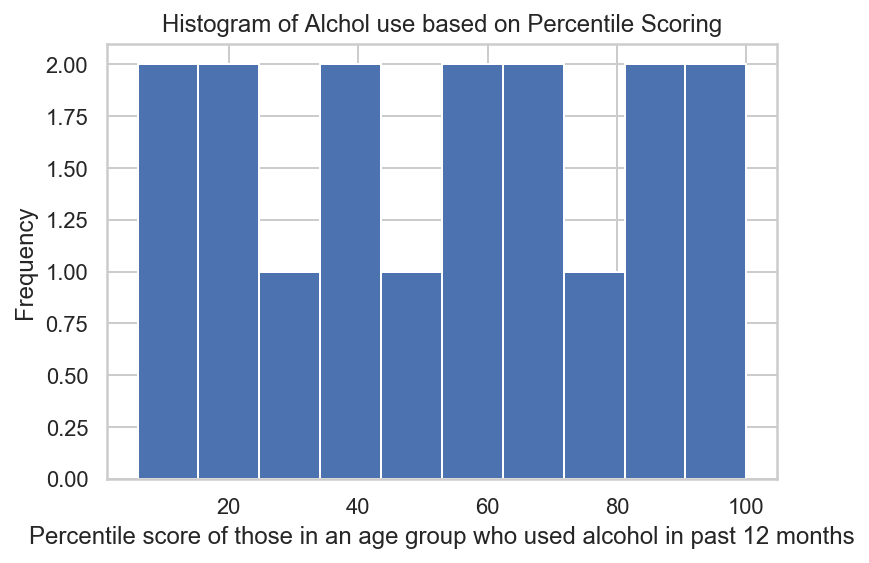

In [32]:
#3. Plot histogram of percentile scored of alcohol variable
drug_use['percentilescore_alcohol'] = drug_use['alcohol']\
    .apply(lambda x: stats.percentileofscore(drug_use['alcohol'], x, kind='weak'))

drug_use['percentilescore_alcohol'].plot.hist()
plt.title('Histogram of Alchol use based on Percentile Scoring')
plt.xlabel('Percentile score of those in an age group who used alcohol in past 12 months');

In [33]:
#4. From the 2 charts, it was observed that the effect of
# converting raw scores to percentile made the chart 'flat'